<a href="https://colab.research.google.com/github/hemasri184753453224kaa/2311CS020532-theta-/blob/main/dt_with_iris_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_name = '/content/iris.csv'

In [ ]:
import pandas as pd
iris = pd.read_csv(file_name) # Changed 'iris' to 'file_name'
iris.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [ ]:
~iris.isnull()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
145,True,True,True,True,True,True
146,True,True,True,True,True,True
147,True,True,True,True,True,True
148,True,True,True,True,True,True


In [ ]:
iris.shape

(150, 6)

In [ ]:
iris.tail()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica
149,150,5.9,3.0,5.1,1.8,virginica


In [ ]:
iris = pd.read_csv('iris.csv',index_col=0)

In [ ]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris = iris.rename(columns={"Species":"Flowers_type"})

In [ ]:
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Flowers_type
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica


In [ ]:
label_encoder = preprocessing.LabelEncoder()
iris['Flowers_type']= label_encoder.fit_transform(iris['Flowers_type'])
iris['Flowers_type']

,Flowers_type
1,0
2,0
3,0
4,0
5,0
...,...
146,2
147,2
148,2
149,2


In [ ]:
x=iris.iloc[:,0:4]
x

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0
149,6.2,3.4,5.4,2.3


In [ ]:
y=iris['Flowers_type']
y

,Flowers_type
1,0
2,0
3,0
4,0
5,0
...,...
146,2
147,2
148,2
149,2


In [ ]:
iris['Flowers_type'].unique()

array([0, 1, 2])

In [ ]:
iris['Flowers_type'].value_counts()

,count
Flowers_type,
0,50
1,50
2,50


In [ ]:
colnames = list(iris.columns)
colnames

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Flowers_type']

In [ ]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=40)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [ ]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
preds = model_gini.predict(x_test)
print(preds)
pd.Series(preds).value_counts()

[0 1 2 2 1 2 1 1 1 0 1 0 0 1 1 2 2 2 1 1 2 2 1 0 1 0 0 2 0 1]


,count
1,13
2,9
0,8


In [ ]:
pred=model_gini.predict(x_test)
np.mean(preds==y_test)

0.9666666666666667

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
pred=model_gini.predict(x_test)
np.median(preds==y_test)

1.0

In [ ]:
from sklearn.tree import DecisionTreeRegressor


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, 0:3]
Y = iris.data[:, 3]

In [ ]:
from sklearn.model_selection import train_test_split # Import the train_test_split function
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, 0:3]
Y = iris.data[:, 3]

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

(120, 3) (30, 3) (120,) (30,)


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
from sklearn.model_selection import train_test_split  # Import the train_test_split function
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeRegressor
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, 0:3]
Y = iris.data[:, 3]


model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(x_train, y_train)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

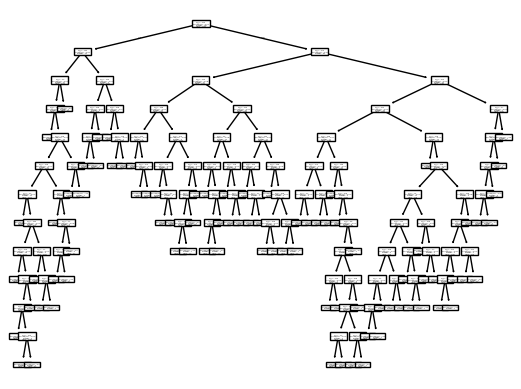

In [ ]:
from sklearn.tree import plot_tree
plot_tree(model); # Changed tree.plot_tree to plot_tree

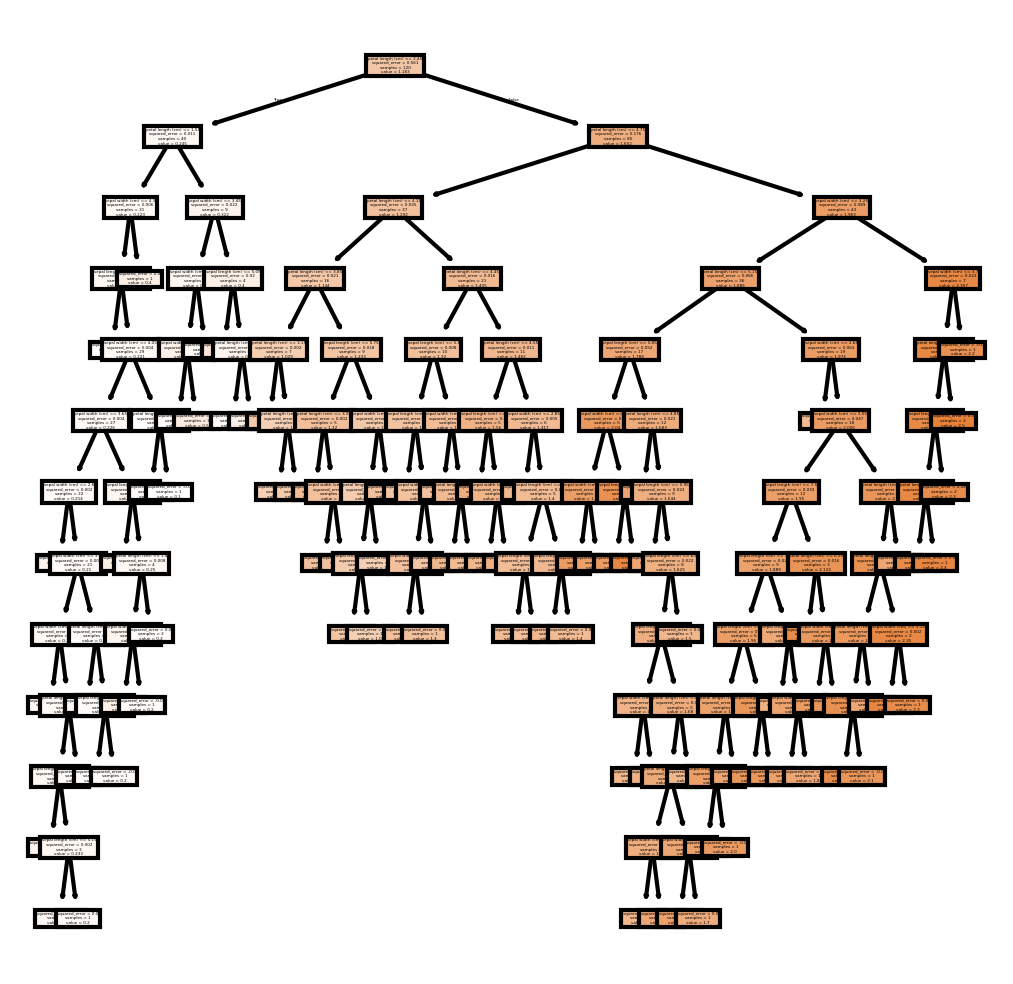

In [ ]:
import matplotlib.pyplot as plt
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa','versiclor','virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(model,feature_names = fn,class_names=cn,filled = True);